# Assignment 8: Clustering Analysis

## Dataset: EastWest Airlines Customer Segmentation

**Objective:** Implement K-Means, Hierarchical, and DBSCAN clustering.

**Topics Covered:**
- K-Means Clustering (Elbow Method)
- Hierarchical Clustering (Dendrogram)
- DBSCAN Clustering
- Silhouette Score

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Load data
df = pd.read_excel('datasets/EastWestAirlines.xlsx', sheet_name=1)
print("Dataset loaded! Shape:", df.shape)
df.head()

Dataset loaded! Shape: (3999, 12)


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,232561,511260,4,1,4,42927,9,58764,16,9871,1
1,2,131378,447721,2,2,4,69049,15,52869,43,9925,1
2,3,237926,411847,5,5,4,44310,32,74646,3,8289,1
3,4,104543,109608,4,2,1,5354,5,76349,71,914,0
4,5,21864,614628,4,3,1,99295,8,2012,9,9722,0


## Data Preprocessing

In [2]:
# Check for missing values
print("Missing values:", df.isnull().sum().sum())

# Drop ID column if exists
if 'ID#' in df.columns:
    df = df.drop('ID#', axis=1)

# Statistical summary
df.describe()

Missing values: 0


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,147915.207802,507519.390598,3.001750,3.013753,2.990498,50580.573143,24.549887,49540.370343,49.325331,5029.693923,0.480120
std,87405.794113,288152.644639,1.404362,1.428139,1.409043,29081.635709,14.358866,28720.101812,28.891795,2885.960638,0.499667
min,241.000000,46.000000,1.000000,1.000000,1.000000,1.000000,0.000000,5.000000,0.000000,3.000000,0.000000
25%,71202.000000,261381.000000,2.000000,2.000000,2.000000,25128.000000,12.000000,24889.000000,24.500000,2540.000000,0.000000
50%,146282.000000,510105.000000,3.000000,3.000000,3.000000,50577.000000,24.000000,49414.000000,49.000000,5002.000000,0.000000
75%,224024.500000,762992.000000,4.000000,4.000000,4.000000,76256.000000,37.000000,74310.500000,75.000000,7540.500000,1.000000
max,299919.000000,999524.000000,5.000000,5.000000,5.000000,99965.000000,49.000000,99999.000000,99.000000,9995.000000,1.000000


In [3]:
# Scale features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
print("Features scaled!")

Features scaled!


## K-Means Clustering

=== Elbow Method ===


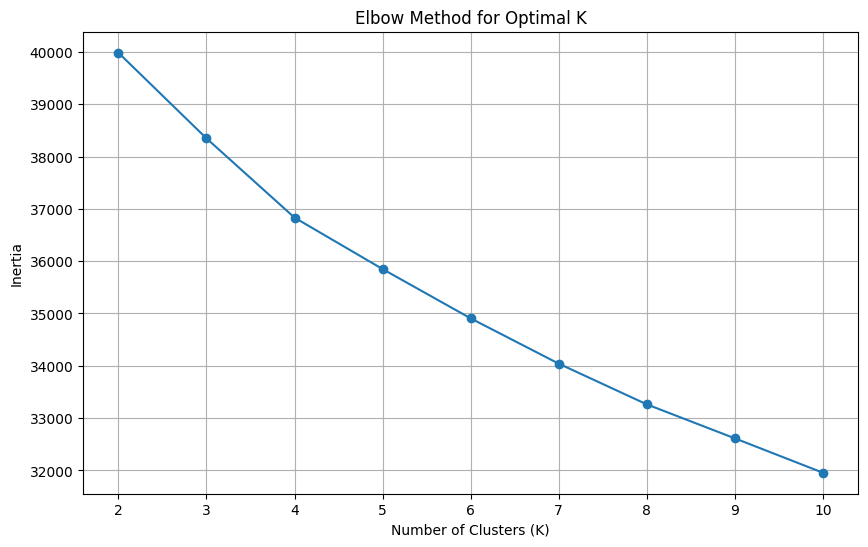

In [4]:
# Elbow Method to find optimal K
print("=== Elbow Method ===")

inertias = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertias.append(kmeans.inertia_)

# Plot Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

In [5]:
# Apply K-Means with optimal K
optimal_k = 4  # Based on elbow curve

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(df_scaled)

# Silhouette Score
silhouette_kmeans = silhouette_score(df_scaled, df['KMeans_Cluster'])
print("K-Means Silhouette Score:", round(silhouette_kmeans, 4))

# Cluster distribution
print("\nCluster Distribution:")
print(df['KMeans_Cluster'].value_counts().sort_index())

K-Means Silhouette Score: 0.0742

Cluster Distribution:
KMeans_Cluster
0     964
1    1054
2    1025
3     956
Name: count, dtype: int64


## Hierarchical Clustering

=== Hierarchical Clustering ===


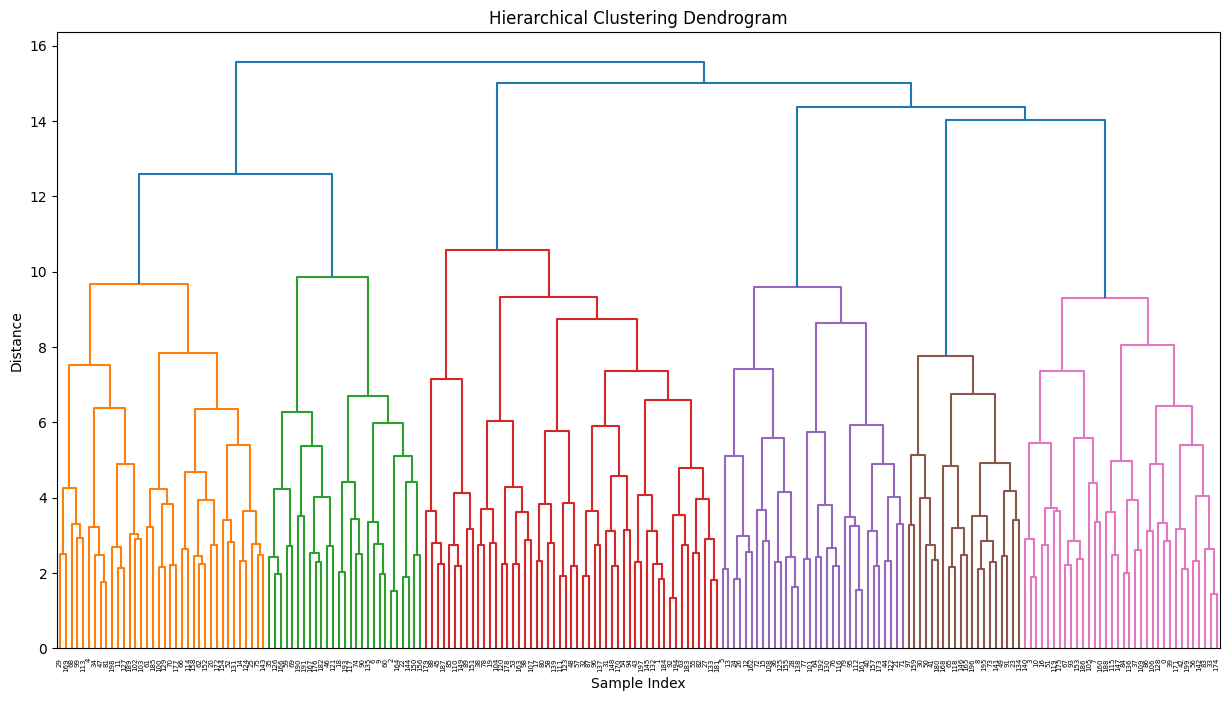

In [6]:
# Dendrogram
print("=== Hierarchical Clustering ===")

plt.figure(figsize=(15, 8))
linkage_matrix = linkage(df_scaled[:200], method='ward')  # Using subset for clarity
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [7]:
# Apply Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=4, linkage='ward')
df['Hierarchical_Cluster'] = hierarchical.fit_predict(df_scaled)

# Silhouette Score
silhouette_hier = silhouette_score(df_scaled, df['Hierarchical_Cluster'])
print("Hierarchical Silhouette Score:", round(silhouette_hier, 4))

print("\nCluster Distribution:")
print(df['Hierarchical_Cluster'].value_counts().sort_index())

Hierarchical Silhouette Score: 0.0329

Cluster Distribution:
Hierarchical_Cluster
0    1073
1    1690
2     511
3     725
Name: count, dtype: int64


## DBSCAN Clustering

In [8]:
# Apply DBSCAN
print("=== DBSCAN Clustering ===")

dbscan = DBSCAN(eps=2.0, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(df_scaled)

# Number of clusters (excluding noise points labeled as -1)
n_clusters = len(set(df['DBSCAN_Cluster'])) - (1 if -1 in df['DBSCAN_Cluster'].values else 0)
n_noise = list(df['DBSCAN_Cluster']).count(-1)

print("Number of clusters:", n_clusters)
print("Number of noise points:", n_noise)

# Silhouette Score (excluding noise)
mask = df['DBSCAN_Cluster'] != -1
if mask.sum() > 1:
    silhouette_dbscan = silhouette_score(df_scaled[mask], df['DBSCAN_Cluster'][mask])
    print("DBSCAN Silhouette Score:", round(silhouette_dbscan, 4))

=== DBSCAN Clustering ===
Number of clusters: 5
Number of noise points: 456
DBSCAN Silhouette Score: -0.0272


## Hierarchical Clustering with Different Linkages

Silhouette Score (linkage=ward): 0.0329
Silhouette Score (linkage=complete): -0.0027
Silhouette Score (linkage=average): 0.0267
Silhouette Score (linkage=single): -0.0094


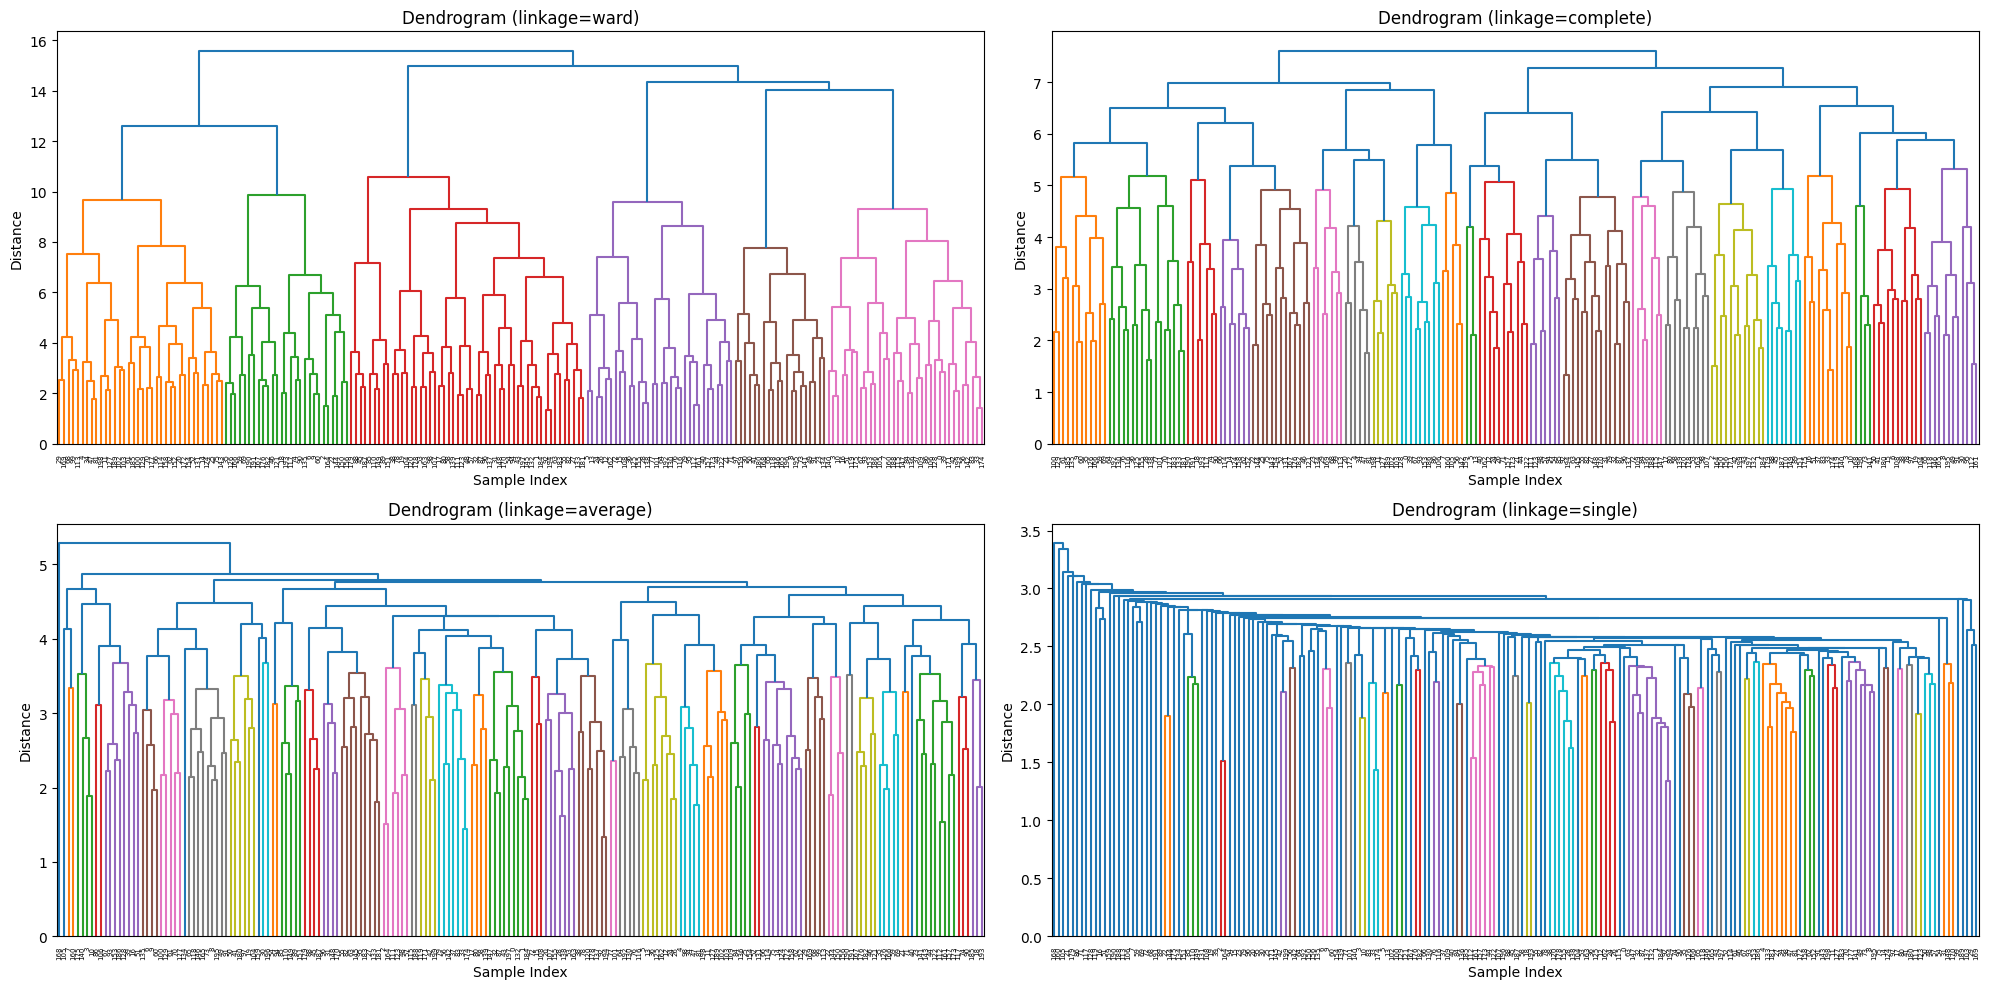


=== Hierarchical Clustering Silhouette Scores ===
ward: 0.0329
complete: -0.0027
average: 0.0267
single: -0.0094


In [9]:
# Hierarchical Clustering with different linkages
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
linkage_methods = ['ward', 'complete', 'average', 'single']
silhouette_scores_hierarchical = []

plt.figure(figsize=(20, 10))

for i, method in enumerate(linkage_methods):
    plt.subplot(2, 2, i + 1)
    
    # Dendrogram
    linkage_matrix = linkage(df_scaled[:200], method=method)  # Using subset for clarity
    dendrogram(linkage_matrix)
    plt.title(f'Dendrogram (linkage={method})')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    
    # Clustering and Silhouette Score
    hierarchical = AgglomerativeClustering(n_clusters=4, linkage=method)
    clusters = hierarchical.fit_predict(df_scaled)
    if len(set(clusters)) > 1:
        score = silhouette_score(df_scaled, clusters)
        silhouette_scores_hierarchical.append(score)
        print(f"Silhouette Score (linkage={method}): {round(score, 4)}")
    else:
        silhouette_scores_hierarchical.append(0)
        print(f"Silhouette Score (linkage={method}): Not applicable (only 1 cluster found)")

plt.tight_layout()
plt.show()

# Compare Silhouette Scores
print("\n=== Hierarchical Clustering Silhouette Scores ===")
for i, method in enumerate(linkage_methods):
    print(f"{method}: {round(silhouette_scores_hierarchical[i], 4)}")

## DBSCAN Parameter Tuning

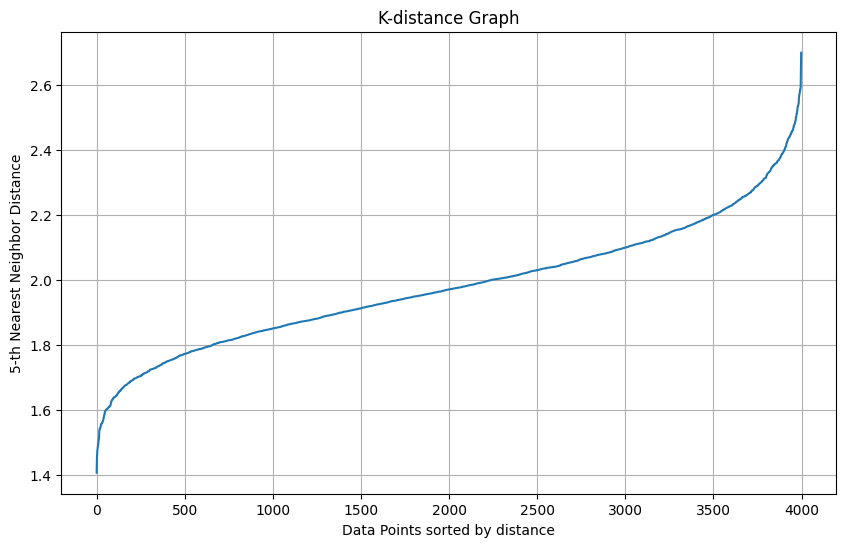

In [10]:
# K-distance plot for DBSCAN eps
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Calculate the distance to the k-th nearest neighbor (k=min_samples)
min_samples_for_k_dist = 5
neighbors = NearestNeighbors(n_neighbors=min_samples_for_k_dist)
neighbors_fit = neighbors.fit(df_scaled)
distances, indices = neighbors_fit.kneighbors(df_scaled)

# Sort the distances
distances = np.sort(distances, axis=0)
distances = distances[:, -1]

# Plot the k-distance graph
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('K-distance Graph')
plt.xlabel('Data Points sorted by distance')
plt.ylabel(f'{min_samples_for_k_dist}-th Nearest Neighbor Distance')
plt.grid(True)
plt.show()

In [11]:
# DBSCAN with tuned parameters
# From the k-distance plot, a good eps value could be around 1.5-2.5
from sklearn.cluster import DBSCAN

eps_values = [1.5, 2.0, 2.5]
min_samples_values = [5, 10, 15]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(df_scaled)
        
        n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
        n_noise = list(clusters).count(-1)
        
        print(f"eps={eps}, min_samples={min_samples}")
        print(f"  Number of clusters: {n_clusters}")
        print(f"  Number of noise points: {n_noise}")
        
        mask = clusters != -1
        if mask.sum() > 1 and n_clusters > 1:
            score = silhouette_score(df_scaled[mask], clusters[mask])
            print(f"  Silhouette Score: {round(score, 4)}")
        else:
            print("  Silhouette Score: Not applicable (less than 2 clusters or all noise)")
        print('-' * 30)

eps=1.5, min_samples=5
  Number of clusters: 8
  Number of noise points: 3953
  Silhouette Score: 0.4609
------------------------------
eps=1.5, min_samples=10
  Number of clusters: 0
  Number of noise points: 3999
  Silhouette Score: Not applicable (less than 2 clusters or all noise)
------------------------------
eps=1.5, min_samples=15
  Number of clusters: 0
  Number of noise points: 3999
  Silhouette Score: Not applicable (less than 2 clusters or all noise)
------------------------------
eps=2.0, min_samples=5
  Number of clusters: 5
  Number of noise points: 456
  Silhouette Score: -0.0272
------------------------------
eps=2.0, min_samples=10
  Number of clusters: 14
  Number of noise points: 1863
  Silhouette Score: -0.1338
------------------------------
eps=2.0, min_samples=15
  Number of clusters: 17
  Number of noise points: 3272
  Silhouette Score: 0.0037
------------------------------
eps=2.5, min_samples=5
  Number of clusters: 1
  Number of noise points: 1
  Silhouette S

## Visualization

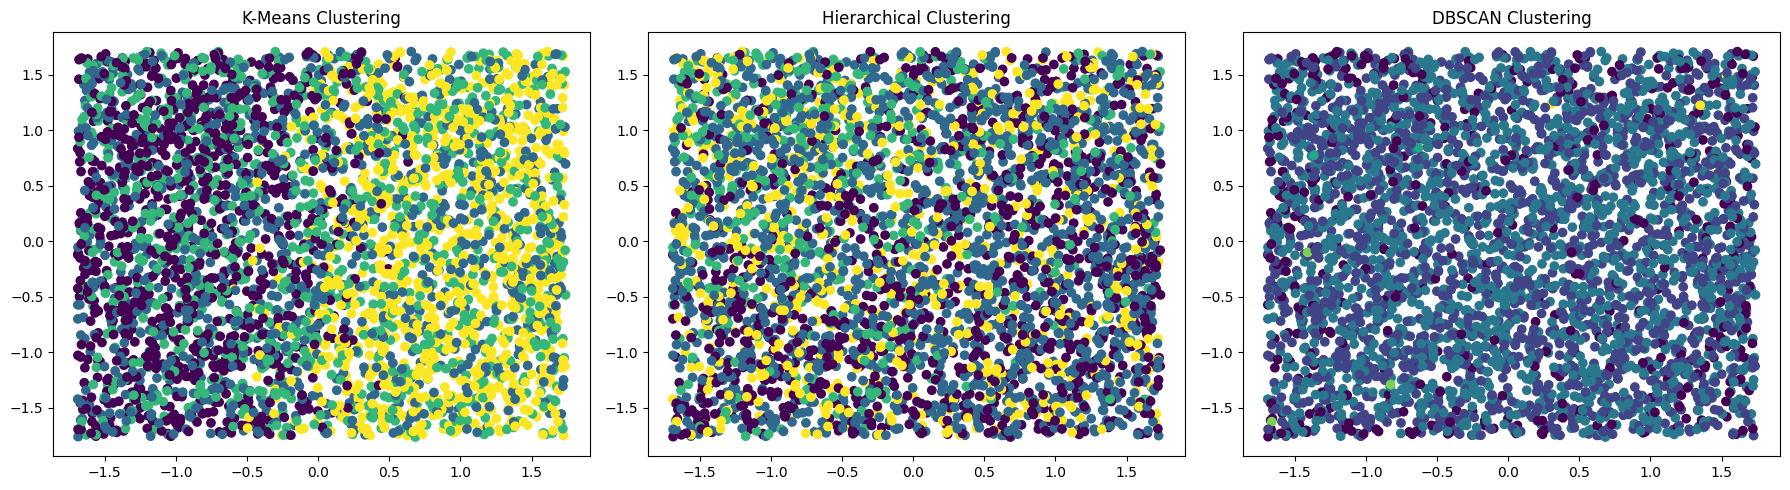

In [12]:
# Compare clustering results using first 2 features
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# K-Means
axes[0].scatter(df_scaled[:, 0], df_scaled[:, 1], c=df['KMeans_Cluster'], cmap='viridis')
axes[0].set_title('K-Means Clustering')

# Hierarchical
axes[1].scatter(df_scaled[:, 0], df_scaled[:, 1], c=df['Hierarchical_Cluster'], cmap='viridis')
axes[1].set_title('Hierarchical Clustering')

# DBSCAN
axes[2].scatter(df_scaled[:, 0], df_scaled[:, 1], c=df['DBSCAN_Cluster'], cmap='viridis')
axes[2].set_title('DBSCAN Clustering')

plt.tight_layout()
plt.show()

In [13]:
# Compare silhouette scores
print("=== Algorithm Comparison ===")
print("K-Means Silhouette:", round(silhouette_kmeans, 4))
print("Hierarchical Silhouette:", round(silhouette_hier, 4))

# Cluster characteristics for K-Means
print("\n=== K-Means Cluster Characteristics ===")
cluster_summary = df.groupby('KMeans_Cluster').mean()
cluster_summary

=== Algorithm Comparison ===
K-Means Silhouette: 0.0742
Hierarchical Silhouette: 0.0329

=== K-Means Cluster Characteristics ===


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Hierarchical_Cluster,DBSCAN_Cluster
KMeans_Cluster,,,,,,,,,,,,,
0,74941.989627,518438.359959,3.015560,3.019710,2.871369,55296.139004,22.420124,51762.110996,51.293568,4987.625519,1.0,0.921162,-0.122407
1,143246.496205,509793.851044,2.945920,3.310247,1.802657,49577.429791,23.952562,49896.715370,49.942125,4946.021822,0.0,1.230550,0.804554
2,150672.184390,519200.930732,3.063415,2.703415,4.217561,50829.821463,25.002927,48144.077073,48.408780,5114.306341,0.0,1.715122,0.789268
3,223690.420502,481476.768828,2.983264,3.013598,3.104603,46664.284519,26.870293,48404.235356,47.643305,5073.644351,1.0,0.987448,-0.106695


## Summary

**Key Findings:**
- K-Means found clear customer segments based on flight patterns
- Hierarchical clustering showed similar results with dendrogram visualization
- DBSCAN identified outliers as noise points

**Insights:**
- Customers can be segmented by their flight frequency and bonus miles
- Different marketing strategies can target each cluster